In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import colors as mcolors
from simulation import run_simple_energy_loss
# Figure config
#LEGEND_SIZE = 12

#### Next we will load the simulation. 
 - It will take a numpy array with dimension M x N as input.
    - M number of design points
    - N number of model parameters of the model
 - It will return a M x P numpy array.
     - M number of design points
     - P number of Momentem bins

In [4]:
simulation=run_simple_energy_loss.run_simulation


#### Make a design matrix

There are 4 parameters currently taken as model parameters. 
 - Initialization
     - T0_in_GeV (deafult value 0.3)
     - tau0 (deafult value 0.2)
     - Tf_in_GeV (deafult value 0.15)
 - Parton Energy loss rates
     - alpha_s (deafult value 0.1)

In [5]:
from emukit.core import ParameterSpace, ContinuousParameter

In [6]:
parameter_space = ParameterSpace([ContinuousParameter('alpha_s', 0.2,0.4 )])

In [7]:
from emukit.core.initial_designs import RandomDesign

design = RandomDesign(parameter_space)
num_data_points = 2
X = design.get_samples(num_data_points)

In [8]:

# design matrix has to have M by N shape. Rows should be design points

def f(alpha_s):
    """returns simulation output for alpha_s design point"""
    n_design=alpha_s.shape[0]
   # print(n_design)
    p_mom=(1, 10, 10)
    # design for alpha_s parameter
    T0_in_fm = np.full((n_design,1), 0.3)
    tau0 = np.full((n_design,1), 0.2)
    Tf_in_fm = np.full((n_design,1), 0.15)
    # We will only consider the change in modle parameter for now
    alpha_s = alpha_s.reshape(-1,1)
    mD_factor = np.full((n_design,1), 1)
    design = np.hstack([T0_in_fm, tau0, Tf_in_fm, alpha_s, mD_factor])
   # print(design.shape)
    observables=simulation(design,*p_mom)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,5].reshape(-1,1)

In [9]:
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

In [10]:
Y = f(X)
model_gpy = GPRegression(X,Y)
model_emukit = GPyModelWrapper(model_gpy)

Working on design 1


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Working on design 2


In [11]:
from emukit.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance


In [12]:
from emukit.experimental_design.acquisitions.contour_1D import contour1D

In [13]:
model_variance = ModelVariance(model = model_emukit)
integrated_var = IntegratedVarianceReduction(model = model_emukit, space=parameter_space)
contour_1D = contour1D(model = model_emukit, a = 0.1, alpha = 1)

In [14]:
from emukit.experimental_design import ExperimentalDesignLoop
expdesign_loop = ExperimentalDesignLoop(model = model_emukit,
                                         space = parameter_space,
                                         acquisition = contour_1D,
                                         batch_size = 1)


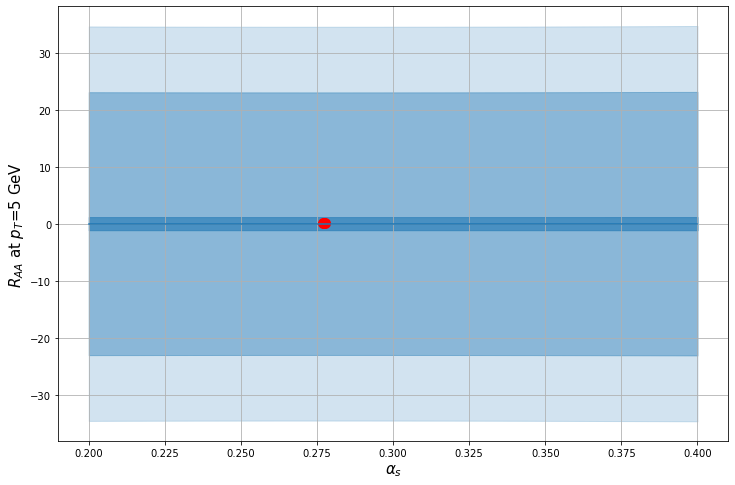

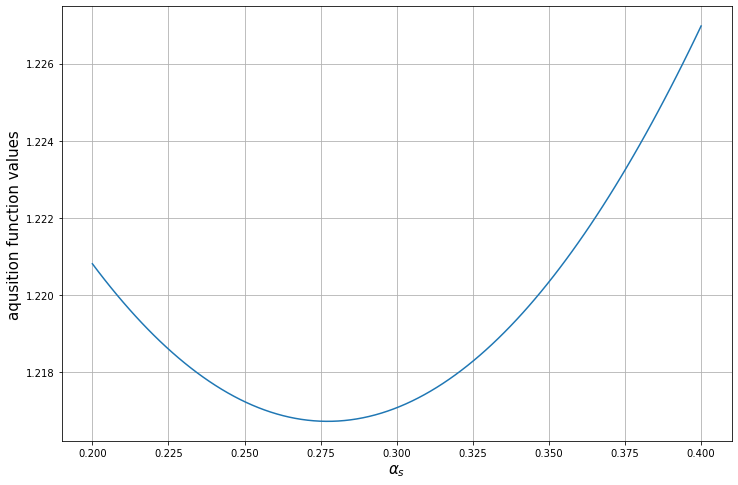

Optimization restart 1/1, f = -8.682637943148066
Working on design 1


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Optimization restart 1/1, f = -16.77120966026873


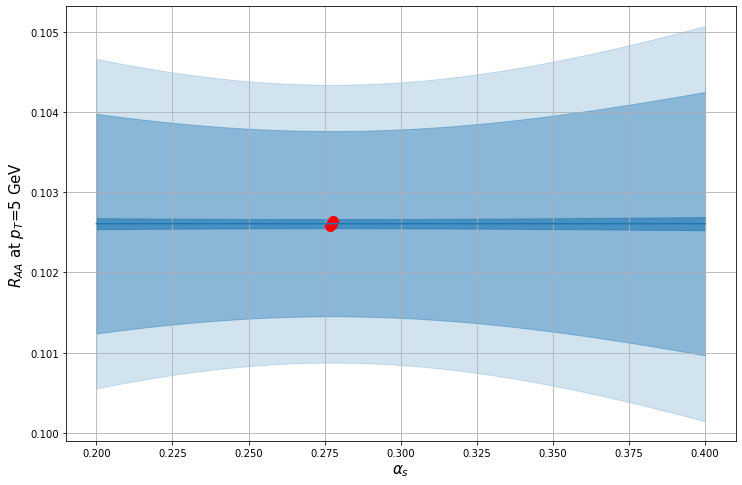

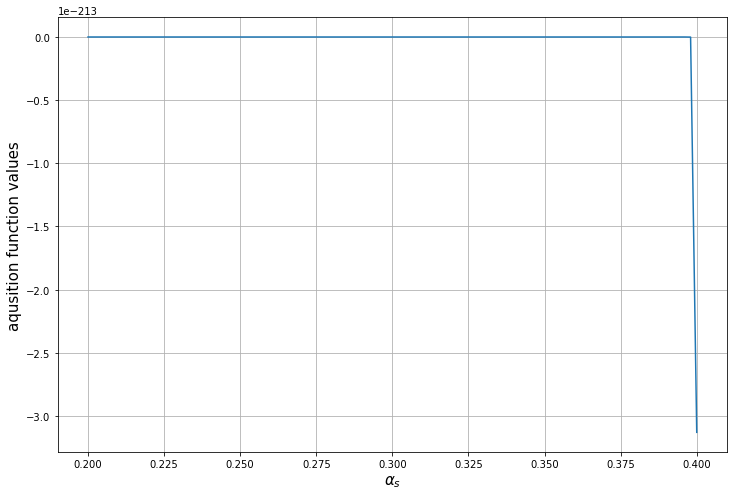

Optimization restart 1/1, f = -16.77120966026873
Working on design 1


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square


Optimization restart 1/1, f = -20.541468277508418


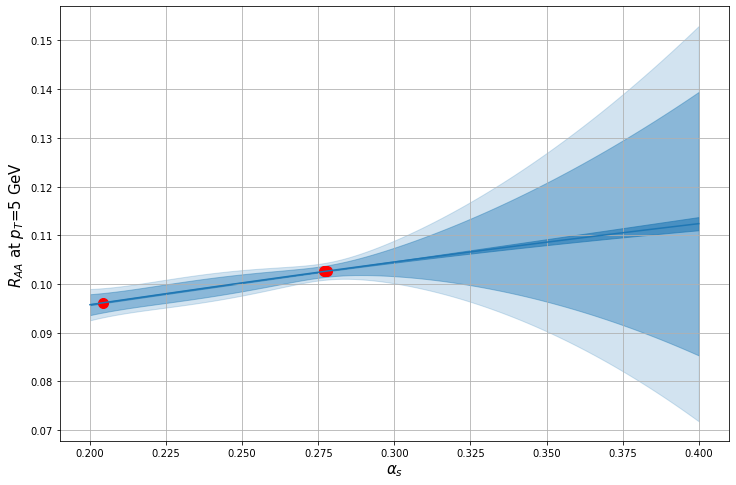

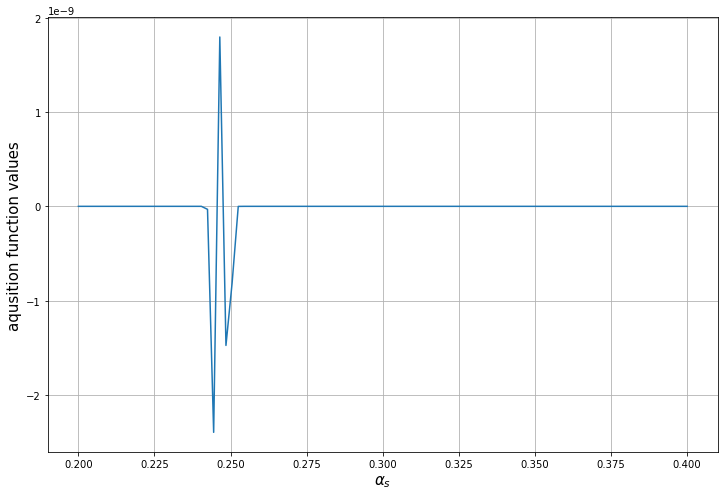

Optimization restart 1/1, f = -20.541468277508418
Working on design 1


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Optimization restart 1/1, f = -27.942012429541677


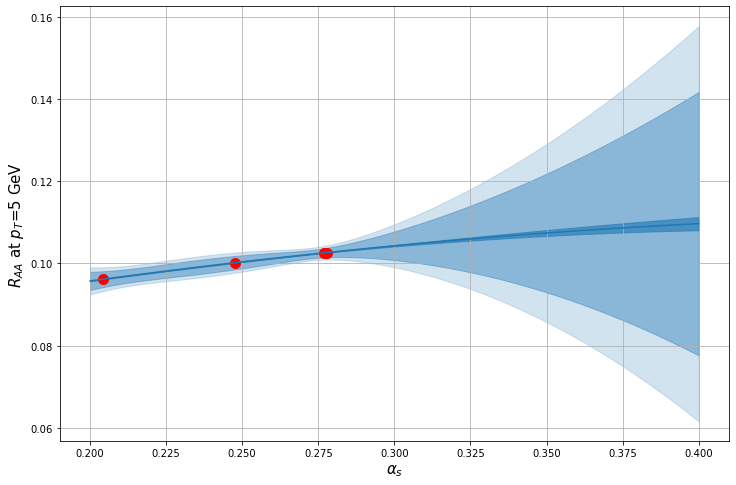

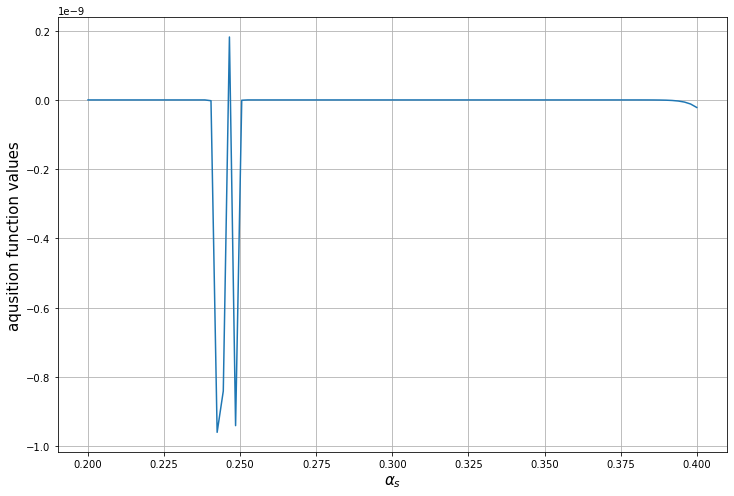

Optimization restart 1/1, f = -27.942012429541677
Working on design 1


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Optimization restart 1/1, f = -35.92055939707294


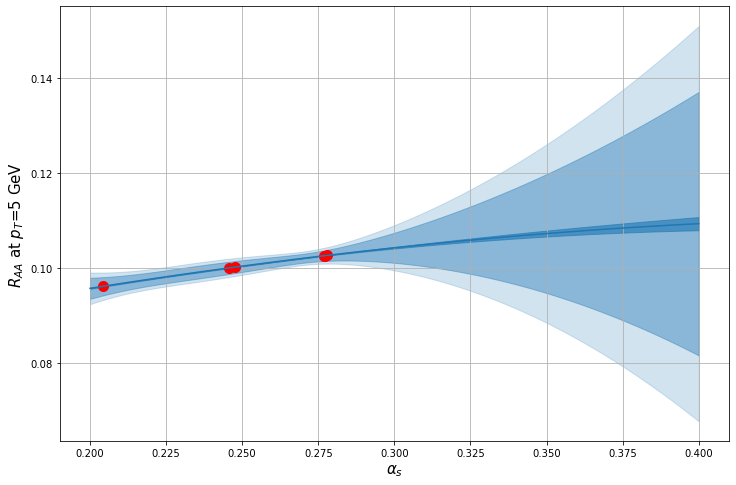

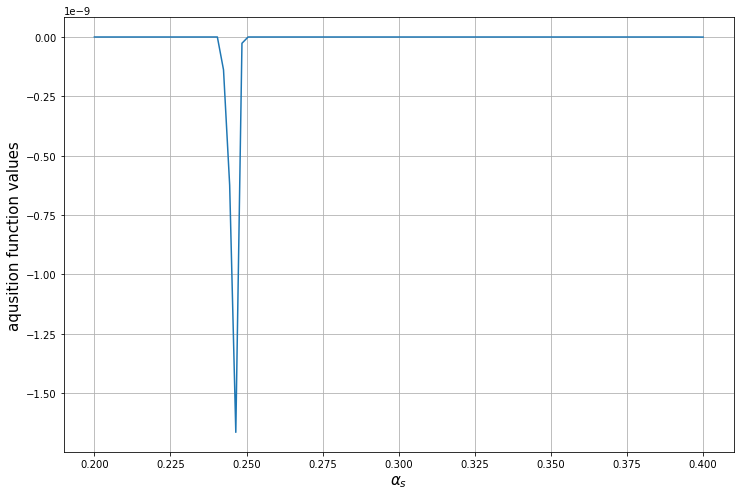

Optimization restart 1/1, f = -35.92055939707294
Working on design 1


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Optimization restart 1/1, f = -44.02004376154309


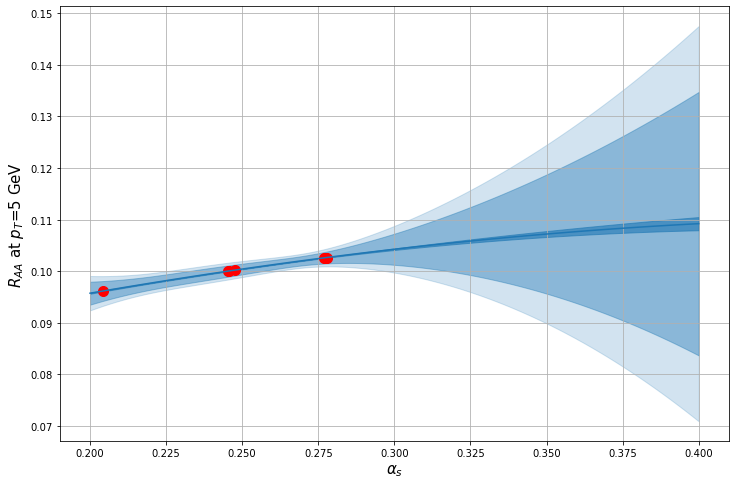

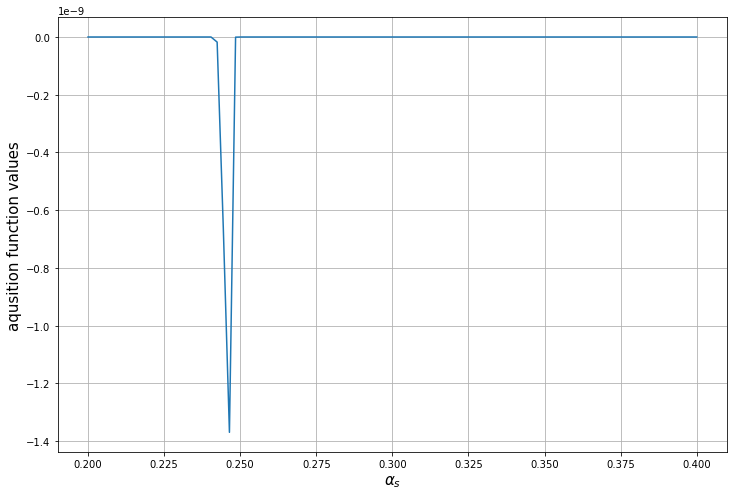

Optimization restart 1/1, f = -44.02004376154309
Working on design 1


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Optimization restart 1/1, f = -52.17311701304742


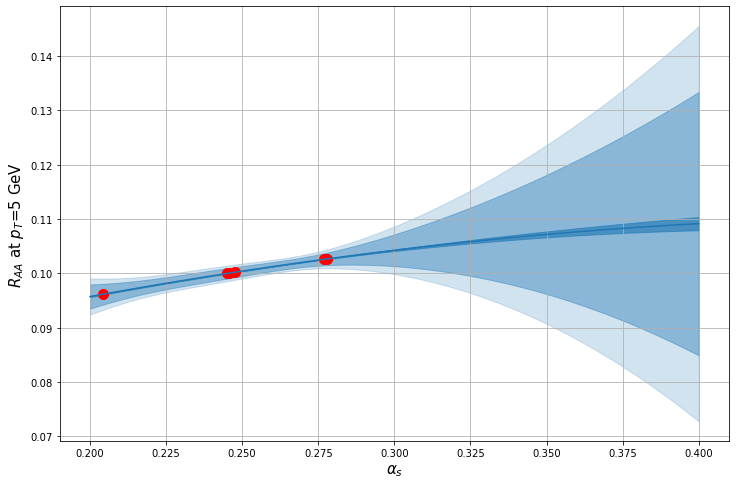

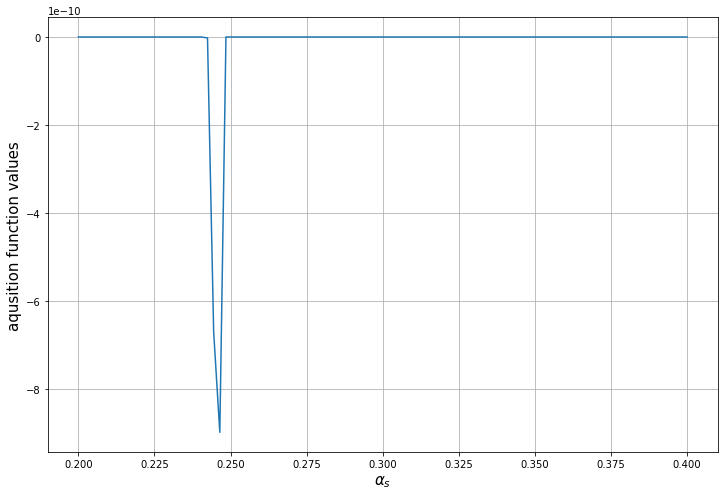

Optimization restart 1/1, f = -52.17311701312107
Working on design 1


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Optimization restart 1/1, f = -60.35659114491012


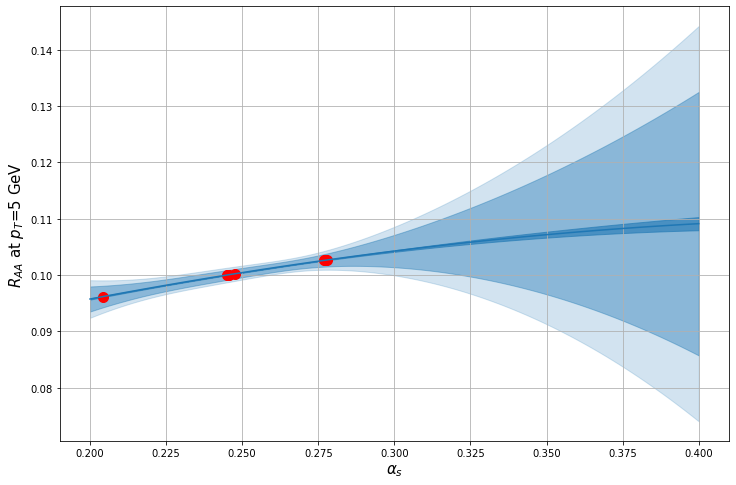

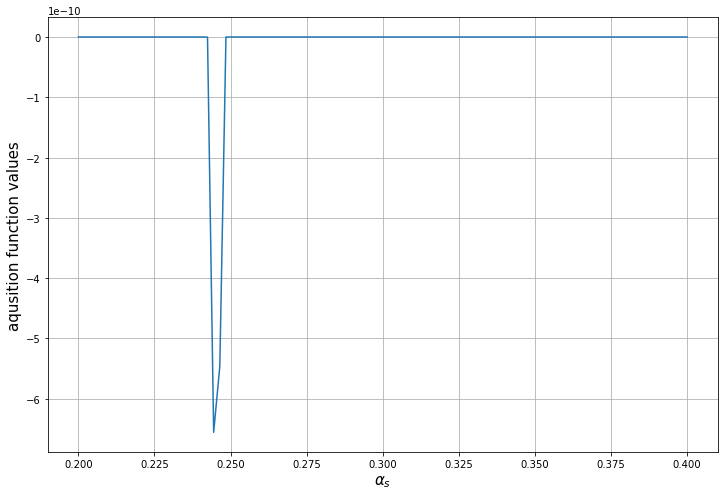

Optimization restart 1/1, f = -60.35659114491012
Working on design 1


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Optimization restart 1/1, f = -68.55906198223417


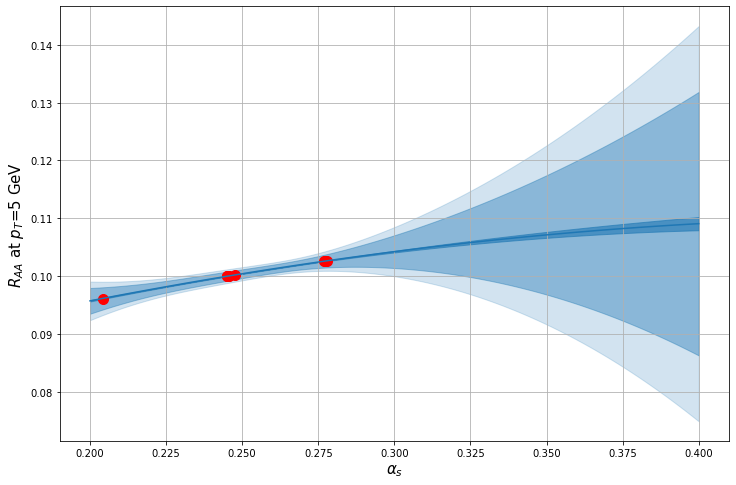

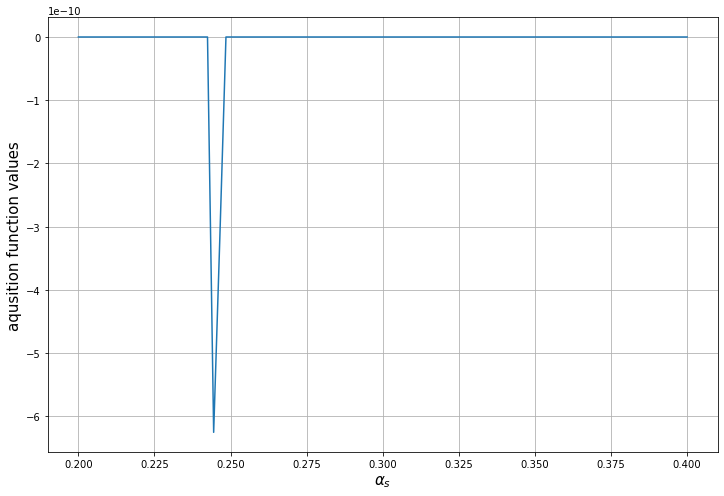

Optimization restart 1/1, f = -68.55906198223417
Working on design 1


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Optimization restart 1/1, f = -76.77461381773111


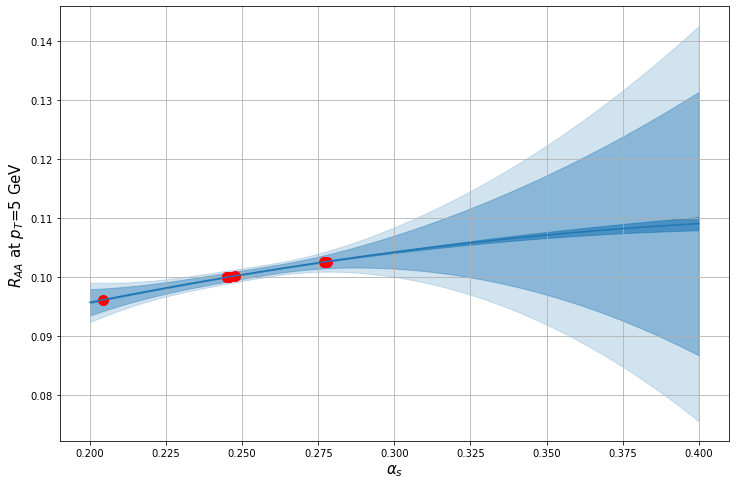

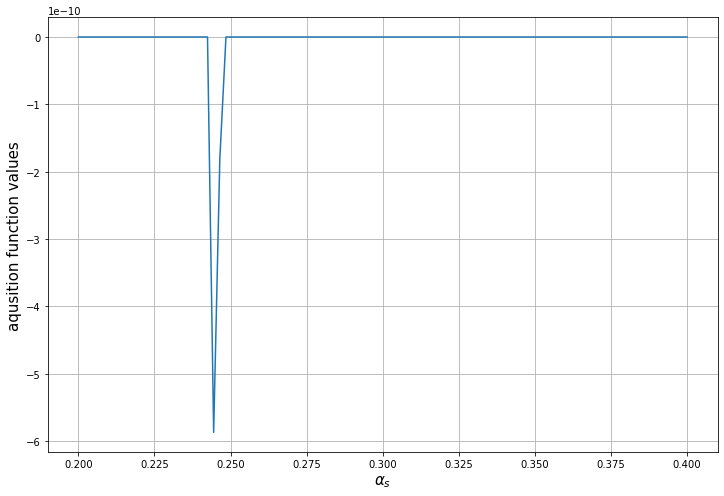

Optimization restart 1/1, f = -76.77461381780313
Working on design 1


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/simulation/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Optimization restart 1/1, f = -85.00071355625315


In [15]:
max_iterations = 10
x_plot = np.linspace(0.2, 0.4,100).reshape(-1,1)

for i in range(0,max_iterations):
    plt.figure(figsize=(12, 8))
    #fig,axs = plt.subplots(nrow=2, ncols=3)
    mu_plot, var_plot = model_emukit.predict(x_plot)
    mu_plot = mu_plot.reshape(-1,1)

    plt.plot(model_emukit.X, model_emukit.Y, "ro", markersize=10, label="Observations")
    plt.plot(x_plot, mu_plot, "C0", label="Model")
    plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - np.sqrt(var_plot)[:, 0], color="C0", alpha=0.6, label=r'$\sigma$')

    plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 20 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 20 * np.sqrt(var_plot)[:, 0], color="C0", alpha=0.4, label=r'$20\sigma$')

    plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 30 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 30 * np.sqrt(var_plot)[:, 0], color="C0", alpha=0.2, label=r'$30\sigma$')
    #plt.legend(loc='upper right', prop={'size': LEGEND_SIZE})
    plt.xlabel(r"$\alpha_s$", fontsize=15)
    plt.ylabel(r"$R_{AA}$" + ' at '+r"$p_T$"+'=5 GeV', fontsize=15)
    plt.grid(True)
    plt.savefig(f'figures/exp_design_ivr_{i}.png',dpi=50)
    plt.show()
    
    plt.figure(figsize=(12,8))
    aqu_values= contour_1D.evaluate(x=x_plot)
    plt.plot(x_plot, aqu_values)
    plt.xlabel(r"$\alpha_s$", fontsize=15)
    plt.ylabel('aqusition function values', fontsize=15)
    plt.grid(True)
    plt.show()
    ed=expdesign_loop.run_loop(f,1)